In [19]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imutils

Not SO Helpful Shit

In [2]:
#process csv
df=pd.read_csv("D:/download_alt/Adobe GenSolve/problems/problems/frag0.csv")

In [3]:
df

,0.000000000000000000e+00,0.000000000000000000e+00.1,4.194200134277343750e+01,6.898000335693359375e+01
0,0.0,0.0,41.259605,69.811707
1,0.0,0.0,40.588753,70.652374
2,0.0,0.0,39.929607,71.501953
3,0.0,0.0,39.282337,72.360405
4,0.0,0.0,38.647114,73.227669
...,...,...,...,...
1769,9.0,0.0,212.755249,2.102682
1770,9.0,0.0,213.760941,2.103762
1771,9.0,0.0,214.766632,2.104841
1772,9.0,0.0,215.772308,2.105921


In [4]:
def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [5]:
csv_processed=read_csv_("D:/download_alt/Adobe GenSolve/problems/problems/frag0.csv")

In [6]:
#processed output
for i in csv_processed:
    print(i[0].shape)

(94, 2)
(166, 2)
(171, 2)
(166, 2)
(109, 2)
(205, 2)
(226, 2)
(208, 2)
(215, 2)
(215, 2)


In [7]:
#np.genfromtxt??

In [8]:
def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

In [9]:
path_input="D:/download_alt/Adobe GenSolve/problems/problems/frag0.csv"
path_output="D:/download_alt/Adobe GenSolve/problems/problems/frag01_sol.csv"

In [10]:
output_data1 = read_csv_(path_input)
output_data2 = read_csv_(path_output)

In [11]:
print(len(output_data1))

10


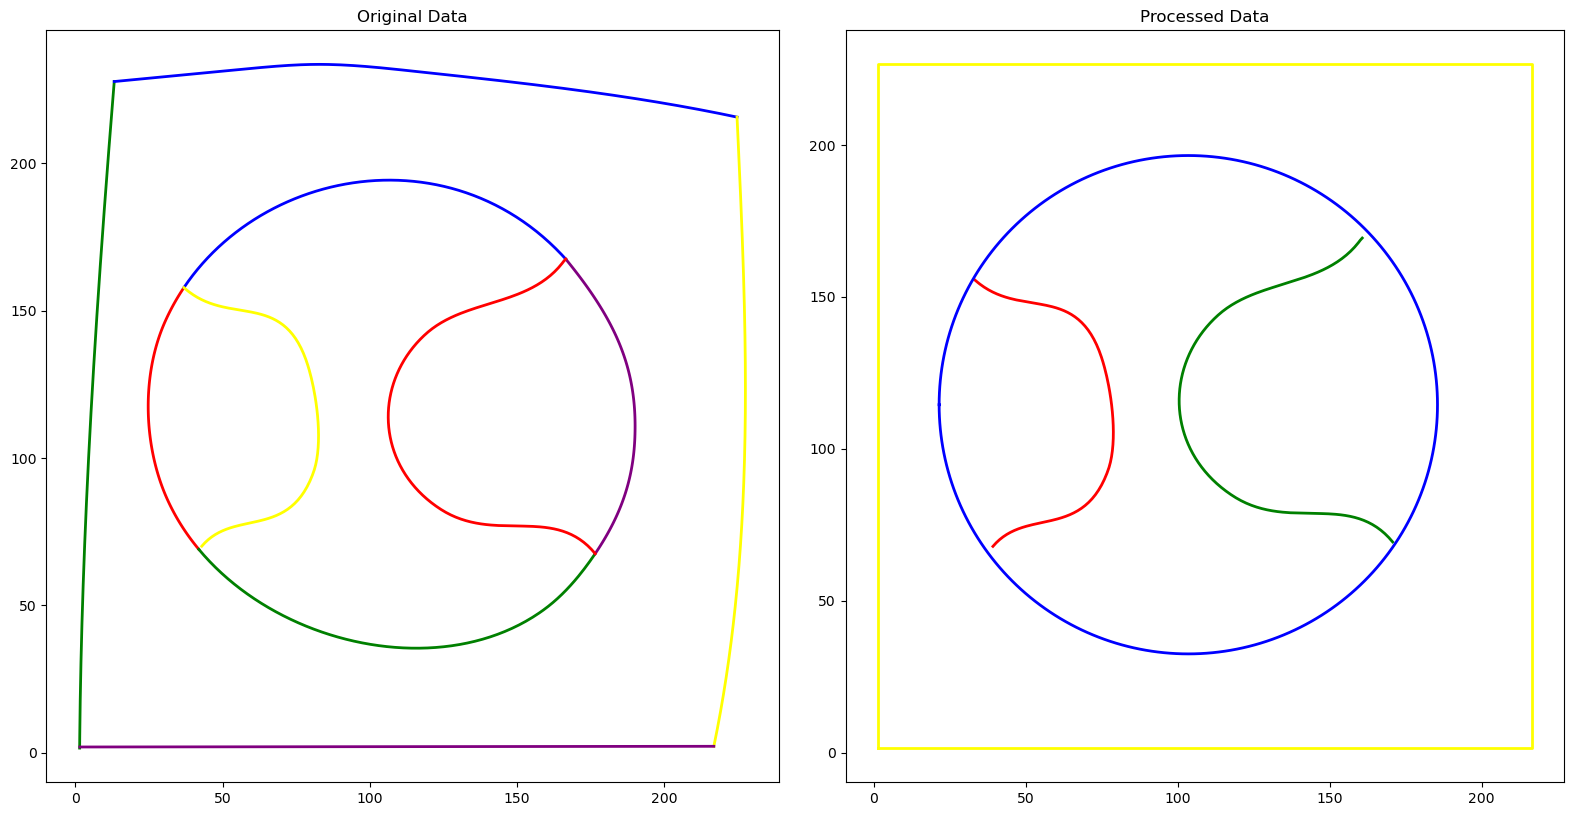

In [12]:
#plotting
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

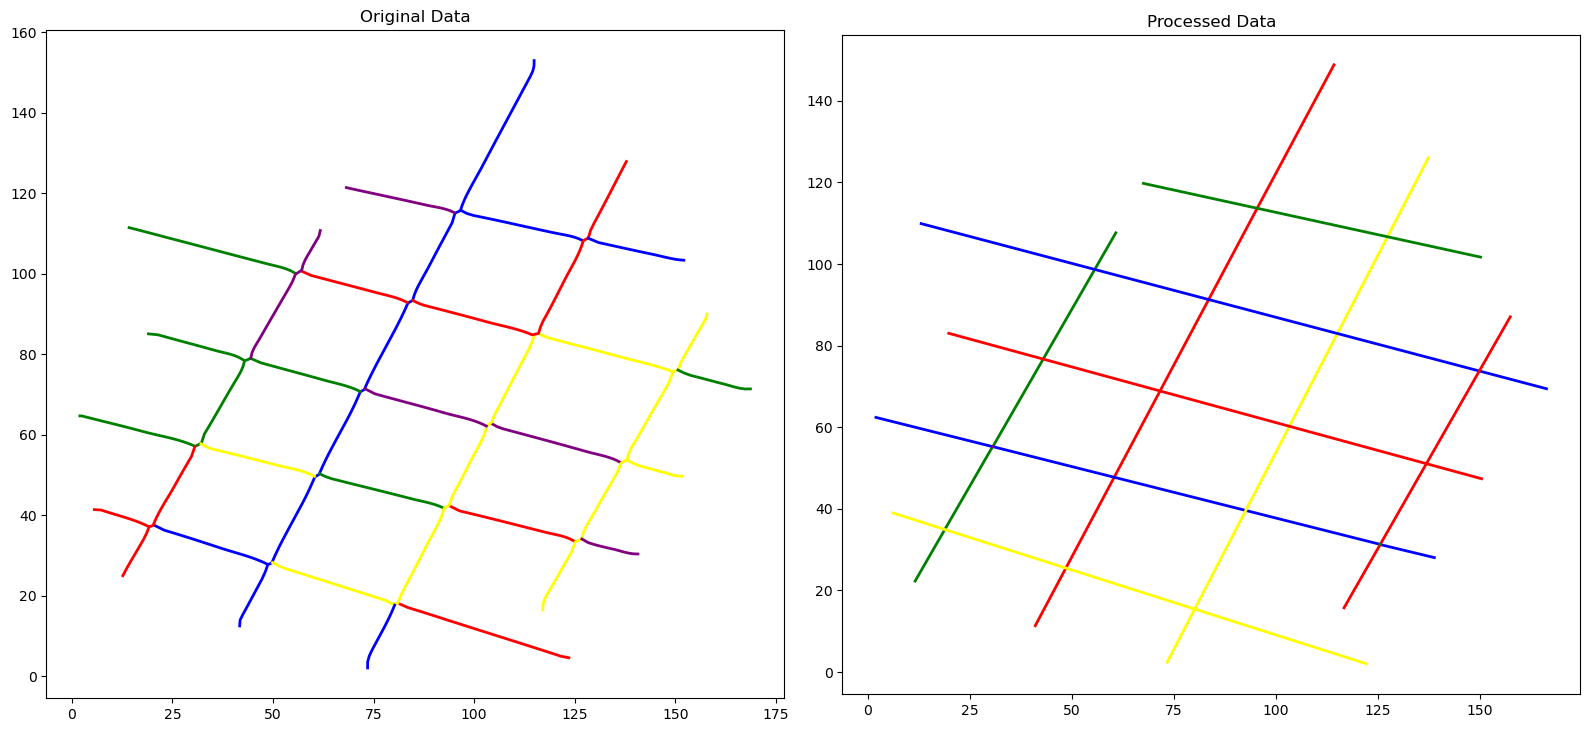

In [13]:
csv_path1 = "D:/download_alt/Adobe GenSolve/problems/problems/frag2.csv"
csv_path2 = "D:/download_alt/Adobe GenSolve/problems/problems/frag2_sol.csv"

output_data1 = read_csv_(csv_path1)
output_data2 = read_csv_(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

Collecting Data From Kaggle Datasets

In [14]:
#Combine Straight Lines and Shapes Datset and Rounded Rectangles and Polygons

In [15]:
#Write a function to replace all \ with / for better path processing
def rep(x):
    return x.replace("\\","/")

In [16]:
#Checking for Contour Centers
path="D:\download_alt\Adobe GenSolve\shapes_and_colors.jpg"
image = cv2.imread(rep(path))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

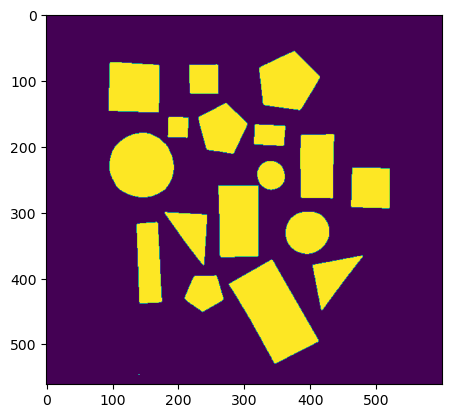

In [17]:
plt.imshow(thresh)
plt.show()

In [20]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [21]:
 #pip install imutils

In [24]:
for c in cnts:
# compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / (M["m00"]+1e-7)) #Error division by 0 handled by adding a small value
    cY = int(M["m01"] / (M["m00"]+1e-7))
# draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image, "center", (cX - 20, cY - 20),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the image
    cv2.imshow("Image", image)
    cv2.waitKey(0)

In [25]:
#Works 

In [26]:
#split and merge Algorithm
#define a Shape Detect Class

Shape Class

In [44]:
class Shape:
    def __init__(self):
        pass
    def detect(self,c):
        #contour->c
        shape='unidentified'
        perimeter=cv2.arcLength(c,1)
        approximation=cv2.approxPolyDP(c,0.04*perimeter,1)
        if(len(approximation)==3):
            shape="triangle"
        elif len(approximation)==4:
            (x,y,w,h)=cv2.boundingRect(approximation)
            ratio=w/float(h)
            shape="square" if ratio>=0.95 and ratio<=1.05 else "reactangle"
        elif len(approximation)==5:
            shape="pentagon"
        else:
            shape="circle"
        return shape

In [45]:
##cv2.arcLength??
#cv2.approxPolyDP??

In [46]:
image = cv2.imread(rep(path))
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = Shape()

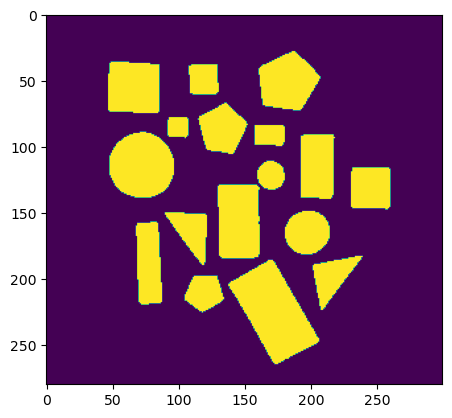

In [47]:
plt.imshow(thresh)
plt.show()

In [48]:
for c in cnts:
# compute the center of the contour, then detect the name of the
# shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]+1e-7) * ratio)
    cY = int((M["m01"] / M["m00"]+1e-7) * ratio)
    shape = sd.detect(c)
# multiply the contour (x, y)-coordinates by the resize ratio,
# then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, (255, 255, 255), 2)
# show the output image
    cv2.imshow("Image", image)
    cv2.waitKey(0)

In [ ]:
#Alternte option check for Circularity (4*pi*area) / (perimeter^2)